# Ordinary Differential Equation

## Euler Method

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import typing as nptyping

In [43]:
from solver import *


def euler_method(
    f, y0, boundary: nptyping.ArrayLike, num: int, method="forward"
) -> tuple:
    a = boundary[0]
    b = boundary[1]
    h = (b - a) / (num - 1)  # step size
    xrange = np.linspace(a, b, num)
    yrange = np.zeros(num)

    if method == "forward":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                yrange[i] = yrange[i - 1] + f([xrange[i - 1], yrange[i - 1]]) * h
        return xrange, yrange
    elif method == "backward":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                obj_func = lambda y: yrange[i - 1] + f([xrange[i], y]) * h - y
                yrange[i] = newton_raphson(obj_func, x0=0.1)
        return xrange, yrange
    elif method == "trapezoid":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                obj_func = (
                    lambda y: yrange[i - 1]
                    + (f([xrange[i - 1], yrange[i - 1]]) + f([xrange[i], y])) * h / 2
                )
                yrange[i] = newton_raphson(obj_func, x0=0.1)
        return xrange, yrange
    else:
        raise Exception(
            "Invalid method. Supported methods are 'forward', 'backward', and 'trapezoidal'."
        )

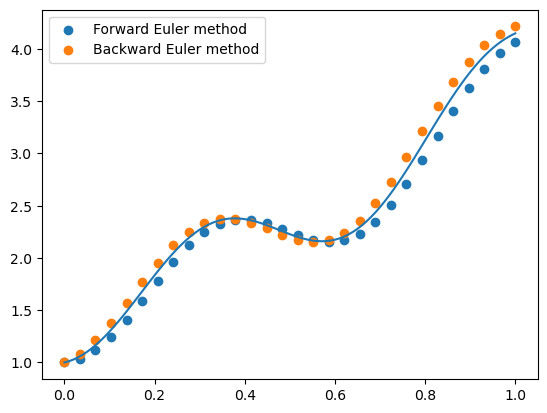

In [44]:
# Example of euler method
def my_func(var):
    x = var[0]
    y = var[1]
    return 4 * np.sin(10 * x) + y


def exact_sol(x):
    result = 4 * np.exp(x) * (
        -10 * np.exp(-x) * np.cos(10 * x) - np.exp(-x) * np.sin(10 * x)
    ) / 101 + 141 / 101 * np.exp(x)
    return result


root_fwd = euler_method(my_func, 1, [0, 1], 30)
root_bkwd = euler_method(my_func, 1, [0, 1], 30, method="backward")

xrange = np.linspace(0, 1, 101)
yrange = exact_sol(xrange)
plt.plot(xrange, yrange)
plt.scatter(root_fwd[0], root_fwd[1], label="Forward Euler method")
plt.scatter(root_bkwd[0], root_bkwd[1], label="Backward Euler method")
plt.legend()

## Predictor-Corrector Method

In [45]:
def predictor_corrector(f, y0, boundary: nptyping.ArrayLike, num: int) -> tuple:
    """
    Returns
    -------
    tuple[np.ndarray, np.ndarray]

    Returns numerically calculated range of root for first order ode.
    Uses Euler predictor and trapezoidal corrector.
    """
    a = boundary[0]
    b = boundary[1]
    h = (b - a) / (num - 1)  # step size
    xrange = np.linspace(a, b, num)
    yrange = np.zeros(num)

    for i in range(num):
        if i == 0:
            yrange[i] = y0
        else:
            y_predict = yrange[i - 1] + f([xrange[i - 1], yrange[i - 1]]) * h
            # Correction step
            yrange[i] = (
                yrange[i - 1]
                + (f([xrange[i - 1], yrange[i - 1]]) + f([xrange[i], y_predict]))
                * h
                / 2
            )

    return xrange, yrange

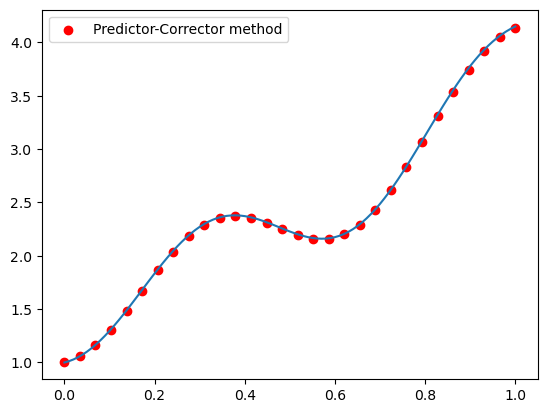

In [46]:
# Example of predictor-corrector method
def my_func(var):
    x = var[0]
    y = var[1]
    return 4 * np.sin(10 * x) + y


def exact_sol(x):
    result = 4 * np.exp(x) * (
        -10 * np.exp(-x) * np.cos(10 * x) - np.exp(-x) * np.sin(10 * x)
    ) / 101 + 141 / 101 * np.exp(x)
    return result


root = predictor_corrector(my_func, 1, [0, 1], 30)

xrange = np.linspace(0, 1, 101)
yrange = exact_sol(xrange)
plt.plot(xrange, yrange)
plt.scatter(root[0], root[1], color="r", label="Predictor-Corrector method")
plt.legend()

# Runge-Kutta Method

In [50]:
def runge_kutta2(
    f, y0, boundary: nptyping.ArrayLike, method="euler", num: int = None, h=None
) -> tuple:
    """
    Returns
    -------
    tuple[np.ndarray, np.ndarray]

    Returns numerically calculated range of root for first order ode.
    Uses Runge-Kutta method of order 2.
    """
    a = boundary[0]
    b = boundary[1]
    if num is not None:
        h = (b - a) / (num - 1)
        xrange = np.linspace(a, b, num)
        yrange = np.zeros(num)
    else:
        if h is None:
            raise Exception("Should set grid number or stepsize.")
        xrange = np.linspace(a, b, int((b - a) / h) + 1)
        num = len(xrange)
        yrange = np.zeros(num)

    if method == "euler":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                k1 = f([xrange[i - 1], yrange[i - 1]])
                k2 = f([xrange[i - 1] + 0.5 * h, yrange[i - 1] + h * 0.5 * k1])
                yrange[i] = yrange[i - 1] + h * (k2)
        return xrange, yrange
    elif method == "ralston":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                k1 = f([xrange[i - 1], yrange[i - 1]])
                k2 = f([xrange[i - 1] + 2 / 3 * h, yrange[i - 1] + h * 2 / 3 * k1])
                yrange[i] = yrange[i - 1] + h * (k1 / 4 + k2 * 3 / 4)
        return xrange, yrange
    elif method == "heun":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                k1 = f([xrange[i - 1], yrange[i - 1]])
                k2 = f([xrange[i - 1] + h, yrange[i - 1] + h * k1])
                yrange[i] = yrange[i - 1] + h * (k1 / 2 + k2 / 2)
        return xrange, yrange
    else:
        raise Exception(
            "Invalid method. Supported methods are 'euler', 'ralston', and 'heun'."
        )

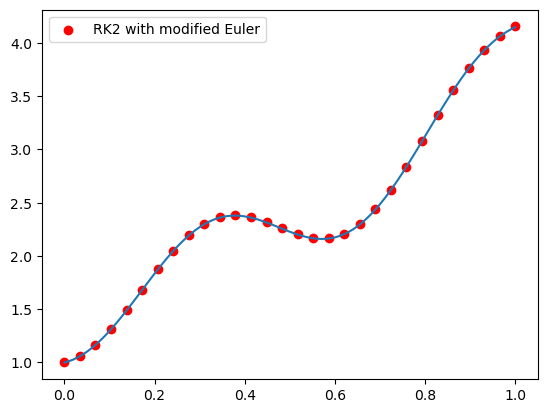

In [51]:
# Example 1 of RK with modified Euler
# Example of predictor-corrector method
def my_func(var):
    x = var[0]
    y = var[1]
    return 4 * np.sin(10 * x) + y


def exact_sol(x):
    result = 4 * np.exp(x) * (
        -10 * np.exp(-x) * np.cos(10 * x) - np.exp(-x) * np.sin(10 * x)
    ) / 101 + 141 / 101 * np.exp(x)
    return result


root = runge_kutta2(my_func, 1, [0, 1], method="euler", num=30)

xrange = np.linspace(0, 1, 101)
yrange = exact_sol(xrange)
plt.plot(xrange, yrange)
plt.scatter(root[0], root[1], color="r", label="RK2 with modified Euler")
plt.legend()

In [53]:
# Example 2 of RK2 with Ralston
from scipy import integrate as sciint


def my_func(var):
    x = var[0]
    y = var[1]
    return (x**2 - x + 1 - 2 * y) / x


root_range = runge_kutta2(my_func, 1 / 2, [1, 2], method="ralston", h=0.2)
print(f"RK2 with ralston >> $y(2)={root_range[1][-1]}$")


def my_func_sci(x, y):
    return (x**2 - x + 1 - 2 * y) / x


root_sci = sciint.solve_ivp(my_func_sci, [1, 2], [0.5])  # This uses RK4(5)
root_sci

RK2 with ralston >> $y(2)=0.8577880610976564$


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.000e+00  1.001e+00  1.011e+00  1.111e+00
             1.728e+00  2.000e+00]
        y: [[ 5.000e-01  5.000e-01  5.000e-01  5.001e-01  5.058e-01
              6.984e-01  8.542e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0